### Tar fram statistik för årsavstämning efter input Richard - Medieanalysen SLL

In [316]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import xlsxwriter
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
import os

In [317]:
# Where to save the figures
PROJECT_ROOT_DIR = os.getcwd()
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,'bilder')

In [318]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [319]:
text_kwargs=dict(fontsize=22, family = 'Arial', loc = 'left', fontweight = 'bold')

__Antal nyheter per år 2012 - 2018__

In [320]:
databas = pd.read_pickle('Databas.pkl')

In [390]:
# Skapar dataframe för 2012-2018
df1 = databas[databas.year.isin([2012,2013,2014,2015,2016,2017,2018])]

In [322]:
y_array = df1.year.value_counts().sort_index().values
df_antal = df1.year.value_counts().sort_index().to_frame().reset_index()
df_antal = df_antal.rename(columns = {'index':'x', 'year':'y'})
x_array = df_antal.x.values

In [323]:
df_antal

,x,y
0,2012,5296
1,2013,7857
2,2014,6660
3,2015,6215
4,2016,7690
5,2017,8053
6,2018,7925


Saving figure Totala antalet rapporterade nyheter per år


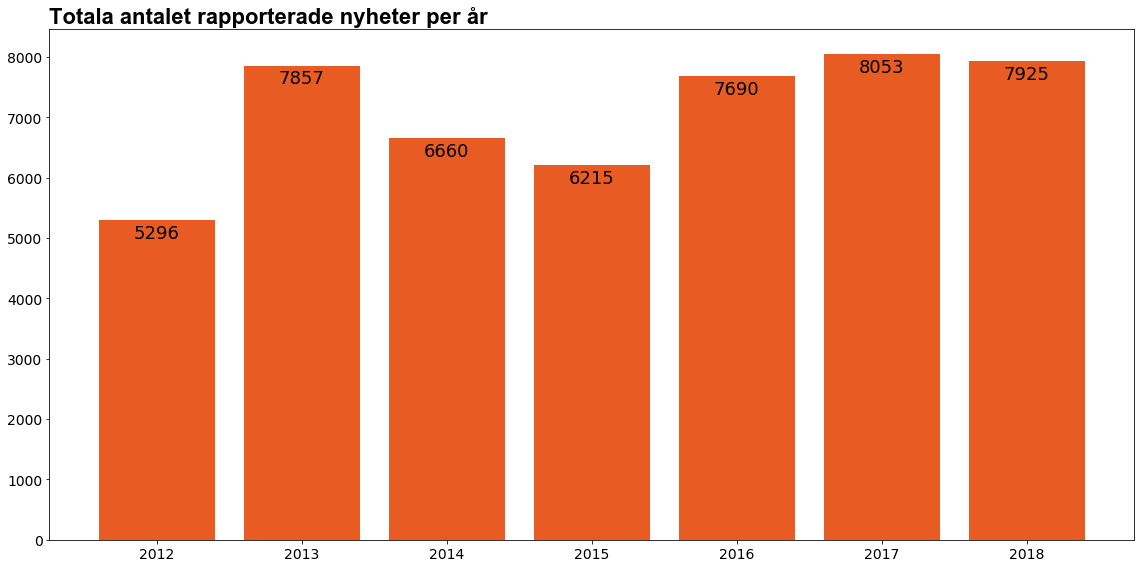

In [324]:
fig, ax1 = plt.subplots(figsize = (16,8))

ax1.bar(df_antal.x, df_antal.y, color = "#E85C24")
for x, y in zip(x_array, y_array):
    ax1.text(x,y-300,str(y), ha = 'center', fontsize=18)

ax1.set_title('Totala antalet rapporterade nyheter per år', **text_kwargs)

save_fig('Totala antalet rapporterade nyheter per år')


plt.show()

__Medelvärde medieindex__

In [325]:
y_array_mean = df1.groupby('year')['index'].mean().sort_index().values
y_array_mean
for x in y_array_mean:
    print(int(round(x)))

100
100
104
102
96
98
96


In [326]:
df_mean = df1.groupby('year')['index'].mean().sort_index().reset_index()
df_mean

,year,index
0,2012,99.732628
1,2013,99.811378
2,2014,103.794595
3,2015,101.747224
4,2016,95.524317
5,2017,98.201912
6,2018,96.435205


In [327]:
df_mean = df_mean.rename(columns = {'year':'x', 'index':'y'})
x_array = df_mean.x.values

In [328]:
df_mean

,x,y
0,2012,99.732628
1,2013,99.811378
2,2014,103.794595
3,2015,101.747224
4,2016,95.524317
5,2017,98.201912
6,2018,96.435205


Saving figure Medelvärde Medieindex


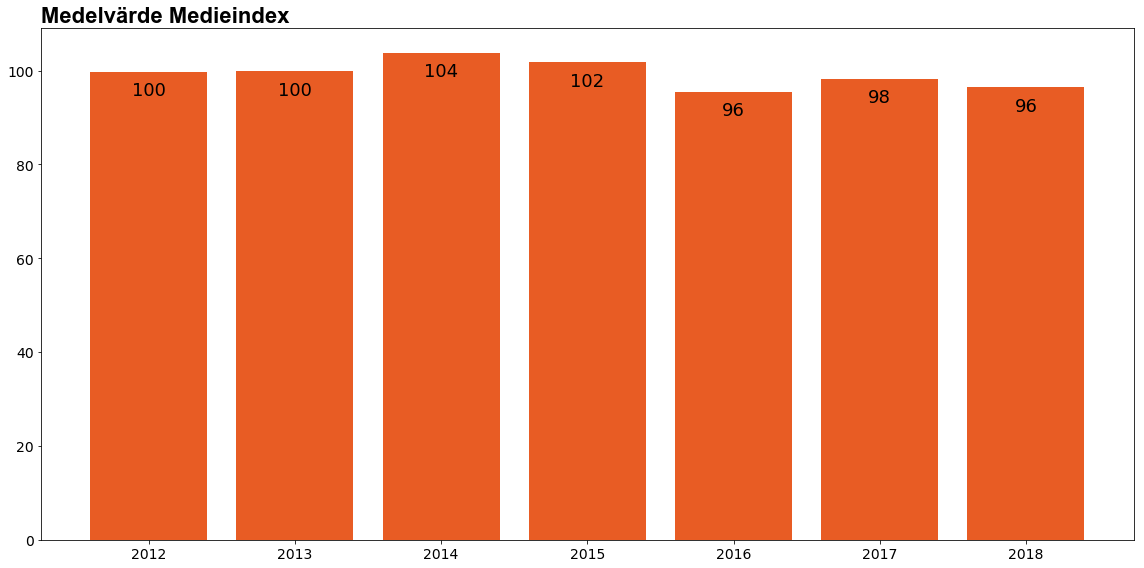

In [329]:
fig2, ax2 = plt.subplots(figsize = (16,8))
ax2.bar(df_mean.x, df_mean.y, color = "#E85C24")

for x, y in zip(x_array, y_array_mean):
    ax2.text(x,y-5,str(int(round(y))), ha = 'center', fontsize=18)

ax2.set_title('Medelvärde Medieindex', **text_kwargs)

save_fig('Medelvärde Medieindex')

plt.show()

__Plottar per månad och kvartal__

In [330]:
df1['Quarter'] = df1.date.dt.quarter
df1['Month'] = df1.date.dt.month

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## För perioden 2012 - 2018 tar vi fram medelvärde för varje kvartal och redovisar i tidsserie för antal redovisade nyheter samt medelvärde medieindex per kvartal

In [331]:
# Medelvärdet av antal artiklar per månad i kvartalet
(df1.groupby(['year', 'Quarter'])['index'].count()/4).to_frame().reset_index()

,year,Quarter,index
0,2012,1,393.50
1,2012,2,310.75
2,2012,3,281.00
3,2012,4,338.75
4,2013,1,438.50
5,2013,2,528.50
6,2013,3,407.50
7,2013,4,589.75
8,2014,1,475.00
9,2014,2,433.00


In [332]:
df1_quarter_n = (df1.groupby(['year', 'Quarter'])['index'].count()/4).to_frame().reset_index().\
rename(columns = {'index':'mindex'})

df1_quarter_n['YQ'] = df1_quarter_n.year.astype(str) + ':' + df1_quarter_n.Quarter.astype(str)
df1_quarter_n.head()

,year,Quarter,mindex,YQ
0,2012,1,393.50,2012:1
1,2012,2,310.75,2012:2
2,2012,3,281.00,2012:3
3,2012,4,338.75,2012:4
4,2013,1,438.50,2013:1


In [333]:
ax2.plot?

Saving figure Utveckling antal artiklar 2012 - 2018, medelvärde per månad i kvartalet


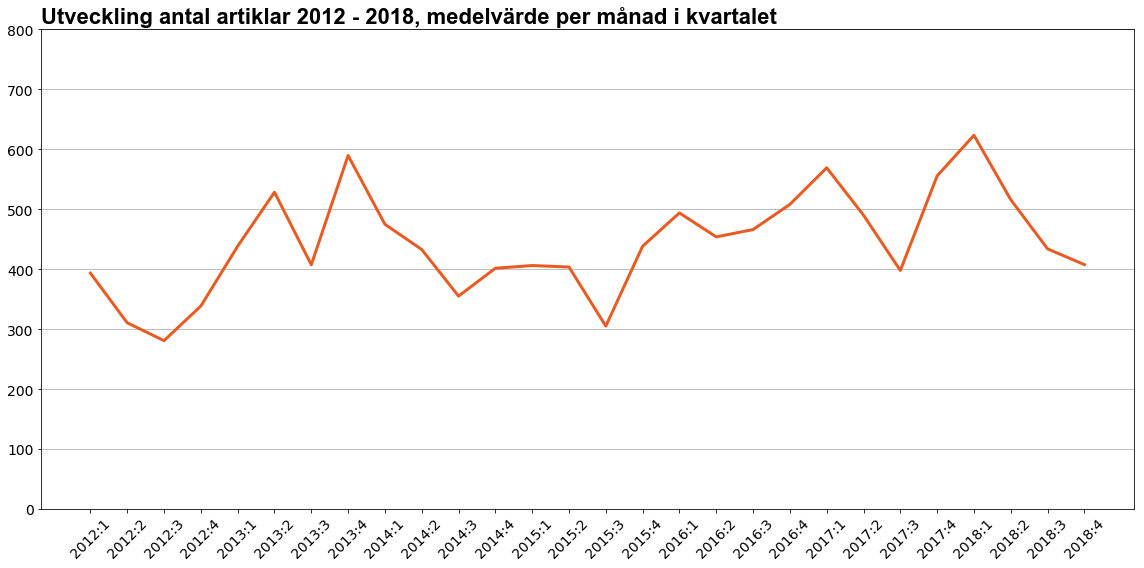

In [334]:
y_label = df1_quarter_n.mindex.values
x_tlabel = df1_quarter_n.YQ
x_axis = np.arange(len(y_label))

# Sätter nödvändiga parametrar för att kunna bygga graf

fig2, ax2 = plt.subplots(figsize = (16,8))

ax2.plot(x_axis, y_label, color = "#E85C24", linewidth = 3 )

ax2.grid(b = True, axis = 'y')

ax2.set_title('Utveckling antal artiklar 2012 - 2018, medelvärde per månad i kvartalet', **text_kwargs)

ax2.set_ybound(0,800)

ax2.set_xticks(x_axis)

ax2.set_xticklabels(x_tlabel, rotation= 45)

save_fig('Utveckling antal artiklar 2012 - 2018, medelvärde per månad i kvartalet')

plt.show()

### Medelvärde index per månad

In [335]:
df1_quarter_mean = df1.groupby(['year', 'Quarter'])['index'].mean().to_frame().reset_index().\
rename(columns = {'index':'mindex'})
                  
                    

In [336]:
df1_quarter_mean['YQ'] = df1_quarter_mean.year.astype(str) + ':' + df1_quarter_mean.Quarter.astype(str)
df1_quarter_mean.head()

,year,Quarter,mindex,YQ
0,2012,1,100.337992,2012:1
1,2012,2,97.864843,2012:2
2,2012,3,96.779359,2012:3
3,2012,4,103.192620,2012:4
4,2013,1,97.698404,2013:1


Saving figure Utveckling Mediendex 2012 - 2018


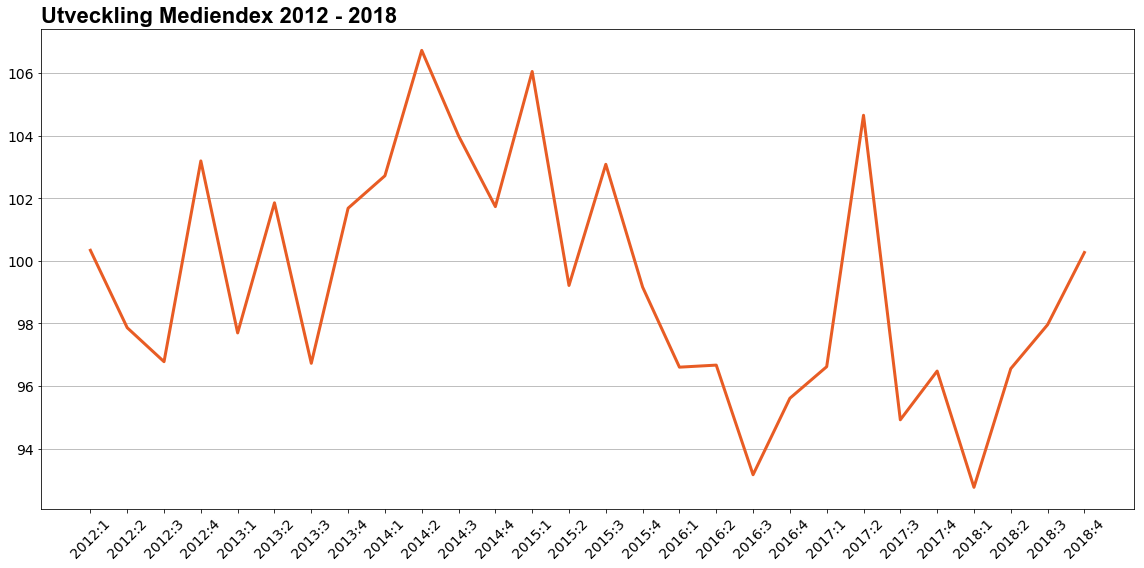

In [337]:
y_label = df1_quarter_mean.mindex.values
x_tlabel = df1_quarter_mean.YQ
x_axis = np.arange(len(y_label))

fig2, ax2 = plt.subplots(figsize = (16,8))

ax2.grid(b = True, axis = 'y')

ax2.plot(x_axis, y_label, color = "#E85C24", linewidth = 3)

ax2.set_title('Utveckling Mediendex 2012 - 2018', **text_kwargs)

#ax2.set_ybound(0,800)

ax2.set_xticks(x_axis)

ax2.set_xticklabels(x_tlabel, rotation= 45)

save_fig('Utveckling Mediendex 2012 - 2018')

plt.show()

## Sedan bryter vi ned till månad

In [338]:
df_plot_n = df1.groupby(['year', 'Month'])['index'].count().reset_index().rename(columns = {'index':'n'})

In [339]:
df_plot_n.head()

,year,Month,n
0,2012,1,434
1,2012,2,585
2,2012,3,555
3,2012,4,386
4,2012,5,426


In [340]:
def mon(x):
    if x == 1:
        mlabel = 'JAN'
    elif x == 2:
        mlabel = 'FEB'
    elif x == 3:
        mlabel = 'MAR'
    elif x == 4:
        mlabel = 'APR'
    elif x == 5:
        mlabel = 'MAJ'
    elif x == 6:
        mlabel = 'JUN'  
    elif x == 7:
        mlabel = 'JUL'
    elif x == 8:
        mlabel = 'AUG'
    elif x == 9:
        mlabel = 'SEP'
    elif x == 10:
        mlabel = 'OKT'
    elif x == 11:
        mlabel = 'NOV'
    else:
        mlabel = 'DEC'
    return mlabel

In [341]:
df_plot_n['mlabel'] = df_plot_n.apply(lambda x: mon(x['Month']), axis = 1)
df_plot_n['MY'] = df_plot_n.mlabel +  df_plot_n.year.astype('str').str[2:]

In [342]:
df_plot_n.head()

,year,Month,n,mlabel,MY
0,2012,1,434,JAN,JAN12
1,2012,2,585,FEB,FEB12
2,2012,3,555,MAR,MAR12
3,2012,4,386,APR,APR12
4,2012,5,426,MAJ,MAJ12


# Plockar ut månad 1, 7 samt 12 - Vi tar bort detta steg
df_plot_qn = df_plot_n[df_plot_n.Month.isin([1,7,12])]

x_label = df_plot_qn.MY.values
x_axis = np.arange(len(x_label))
x_axis

# Antal artiklar per kvartal
fig3, ax3 = plt.subplots(figsize = (16,8))

text_kwargs=dict(fontsize=20, family = 'Arial', loc = 'left')
ax3.plot(x_axis, df_plot_qn.n, color = "#E85C24")


ax3.set_title('Antal artiklar 2012-2018', **text_kwargs)

ax3.set_xticks(x_axis)

ax3.set_xticklabels(x_label, rotation= 45
                   )

ax3.set_ylim(200,1000)


plt.show()

### Antal artiklar per månad 2016-2018

Saving figure Antal artiklar 2016-2018


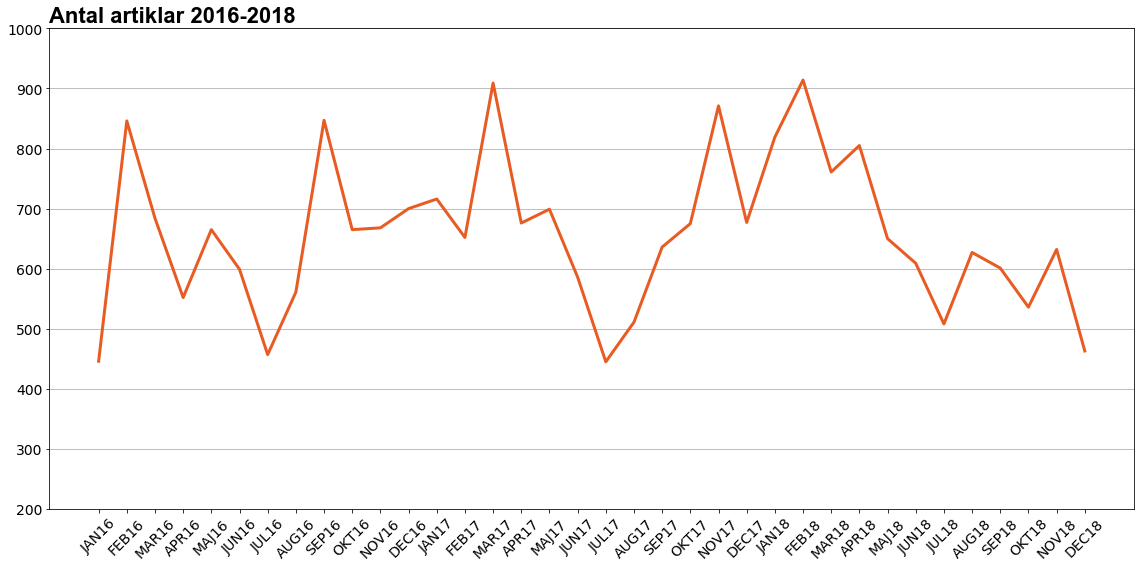

In [343]:
# Sedan antal artiklar per månad 2016-2018

df_plot_nm = df_plot_n[df_plot_n.year >= 2016]

x_label_m = df_plot_nm.MY.values
x_axis_m = np.arange(len(x_label_m))

# Antal artiklar per kvartal
fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(x_axis_m, df_plot_nm.n, color = "#E85C24", linewidth = 3)

ax3.set_title('Antal artiklar 2016-2018', **text_kwargs)

ax3.set_xticks(x_axis_m)

ax3.set_xticklabels(x_label_m, rotation= 45)

ax3.grid(b = True, axis = 'y')

ax3.set_ylim(200,1000)

save_fig('Antal artiklar 2016-2018')


plt.show()

## Antal artiklar 2018

Saving figure Antal artiklar per månad 2018


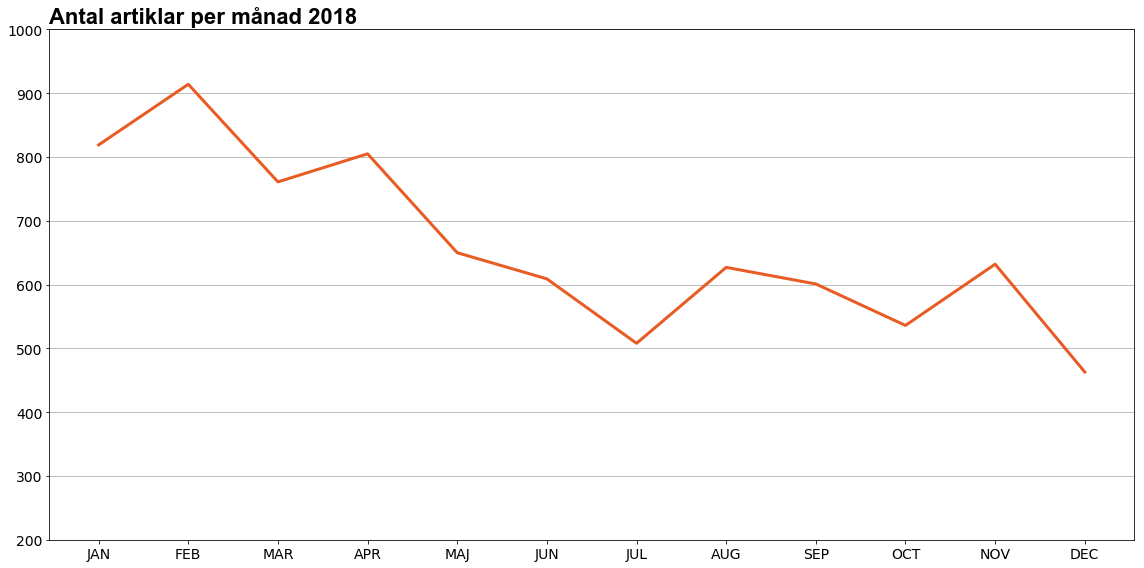

In [344]:
df_plot_n_month = df1[df1.year == 2018].groupby(['Month'])['index'].count().reset_index().rename(columns = {'index':'n'})

## Antal artiklar per månad 2018

fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(df_plot_n_month.Month, df_plot_n_month.n, color = "#E85C24", linewidth = 3)

ax3.grid(b = True, axis = 'y')

ax3.set_title('Antal artiklar per månad 2018', **text_kwargs)

ax3.set_xticks(df_plot_n_month.Month)

ax3.set_xticklabels(['JAN','FEB','MAR','APR','MAJ','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], rotation= 0
                   )

ax3.set_ylim([200,1000])

save_fig('Antal artiklar per månad 2018')


plt.show()


In [345]:
df_plot_mean = df1.groupby(['year', 'Month'])['index'].mean().reset_index().rename(columns = {'index':'avg'})
df_plot_mean.head()

,year,Month,avg
0,2012,1,98.202765
1,2012,2,98.018803
2,2012,3,104.452252
3,2012,4,87.717617
4,2012,5,108.584507


In [346]:
df_plot_mean['mlabel'] = df_plot_mean.apply(lambda x: mon(x['Month']), axis = 1)
df_plot_mean['MY'] = df_plot_mean.mlabel +  df_plot_mean.year.astype('str').str[2:]
df_plot_mean.head()

,year,Month,avg,mlabel,MY
0,2012,1,98.202765,JAN,JAN12
1,2012,2,98.018803,FEB,FEB12
2,2012,3,104.452252,MAR,MAR12
3,2012,4,87.717617,APR,APR12
4,2012,5,108.584507,MAJ,MAJ12


In [347]:
x_label_m = df_plot_mean[df_plot_mean.year >= 2016].MY.values
x_label_m

array(['JAN16', 'FEB16', 'MAR16', 'APR16', 'MAJ16', 'JUN16', 'JUL16',
       'AUG16', 'SEP16', 'OKT16', 'NOV16', 'DEC16', 'JAN17', 'FEB17',
       'MAR17', 'APR17', 'MAJ17', 'JUN17', 'JUL17', 'AUG17', 'SEP17',
       'OKT17', 'NOV17', 'DEC17', 'JAN18', 'FEB18', 'MAR18', 'APR18',
       'MAJ18', 'JUN18', 'JUL18', 'AUG18', 'SEP18', 'OKT18', 'NOV18',
       'DEC18'], dtype=object)

__Per månad 2016-2018__

Saving figure Utveckling Medieindex 2016-2018


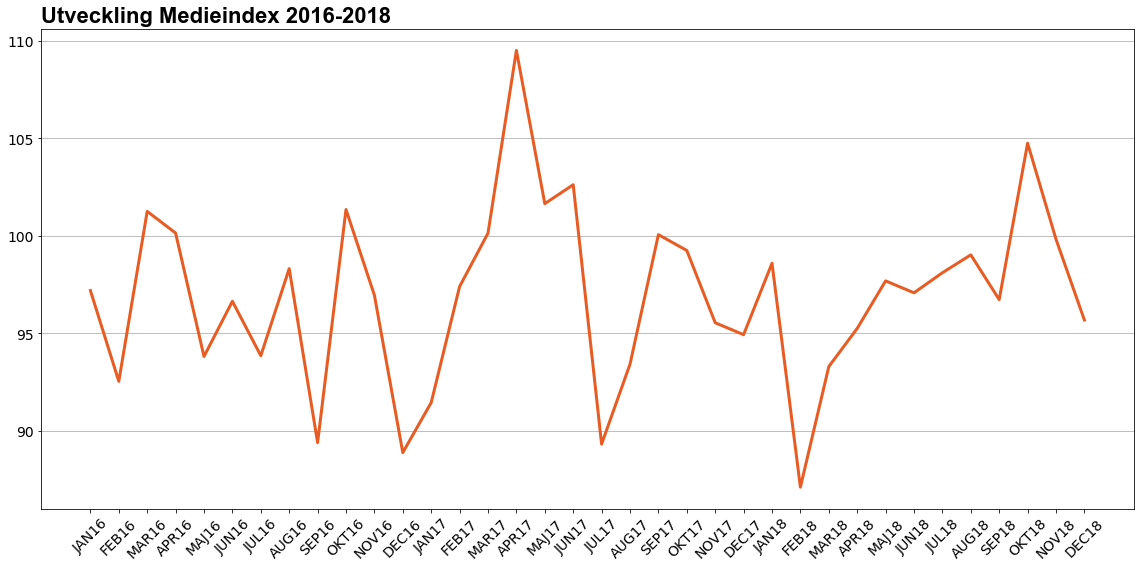

In [348]:
# Medelvärde index per månad 2016-2018

df_plot_nm = df_plot_mean[df_plot_mean.year >= 2016]

x_label_m = df_plot_mean[df_plot_mean.year >= 2016].MY.values
x_axis_m = np.arange(len(x_label_m))

fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(x_axis_m, df_plot_nm.avg, color = "#E85C24", linewidth = 3)

ax3.grid(b = True, axis = 'y')


ax3.set_title('Utveckling Medieindex 2016-2018', **text_kwargs)

ax3.set_xticks(x_axis_m)

ax3.set_xticklabels(x_label_m, rotation= 45)

#ax3.set_ylim(200,1000)

save_fig('Utveckling Medieindex 2016-2018')


plt.show()

### Plockar ut per månad 2018 

Saving figure Medieindex per månad 2018


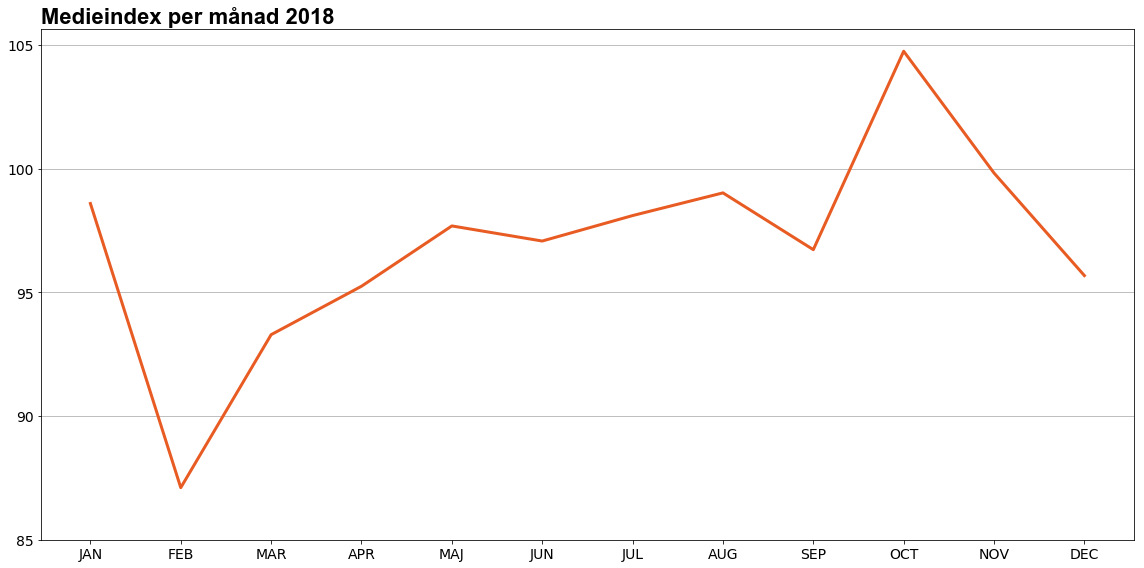

In [349]:
df_plot_n_month = df1[df1.year == 2018].groupby(['Month'])['index'].mean().reset_index().rename(columns = {'index':'avg'})

## Antal artiklar per månad 2018

fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(df_plot_n_month.Month, df_plot_n_month.avg, color = "#E85C24", linewidth = 3)

ax3.grid(b = True, axis = 'y')


ax3.set_title('Medieindex per månad 2018', **text_kwargs)

ax3.set_xticks(df_plot_n_month.Month)

ax3.set_xticklabels(['JAN','FEB','MAR','APR','MAJ','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], rotation= 0)

ax3.set_yticks

ax3.set_yticks([85,90,95,100,105])

save_fig('Medieindex per månad 2018')


plt.show()

### Nu tar vi fram antal och medelvärde i tre grafer i samma plot

In [350]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49696 entries, 0 to 5
Data columns (total 17 columns):
Nr         49681 non-null float64
med        49696 non-null float64
Kanal      49627 non-null float64
nykat      49695 non-null float64
Impact     49696 non-null float64
mfyll      49696 non-null float64
Akt_r      34618 non-null float64
rubrik     34591 non-null object
nykat1     49693 non-null object
kanal1     49692 non-null object
date       49696 non-null datetime64[ns]
vers       49696 non-null object
year       49696 non-null int64
vecka      49696 non-null float64
index      49696 non-null float64
Quarter    49696 non-null int64
Month      49696 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(3), object(4)
memory usage: 6.8+ MB


In [351]:
grouped_df = df1[df1.year >= 2016].groupby(['year','Month'])

In [352]:
# För antal artiklar
graf_df = grouped_df.index.count().to_frame().reset_index().rename(columns = {'index':'n'})

In [353]:
# För medelvärde index
graf_avg = grouped_df.index.mean().to_frame().reset_index().rename(columns = {'index':'avg'})

Saving figure Utveckling antal artiklar medieindex 2016-2018 - plot


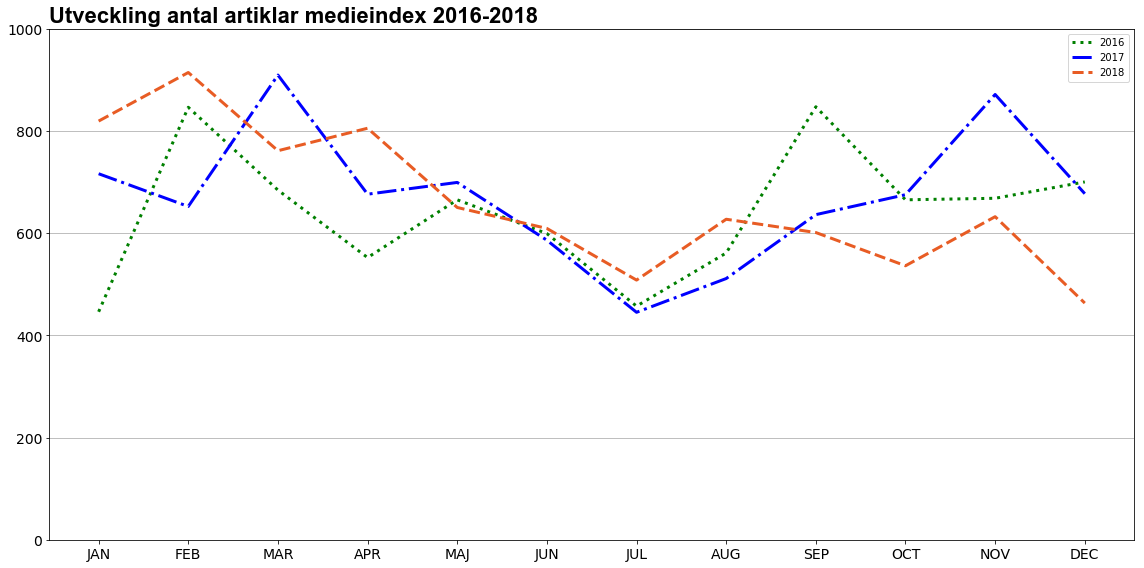

In [372]:
# Utveckling antal artiklar medieindex 2016-2018
y1 = graf_df.iloc[:12]['n'].values
y2 = graf_df.iloc[12:24]['n'].values
y3 = graf_df.iloc[24:]['n'].values

x_axis = np.arange(len(y1))

fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(x_axis, y1, color = "green", linestyle=':', label = '2016', linewidth = 3)
ax3.plot(x_axis, y2, color = "blue", linestyle='-.', label = '2017', linewidth = 3)
ax3.plot(x_axis, y3, color = "#E85C24", linestyle='--', label = '2018', linewidth = 3)

ax3.grid(b = True, axis = 'y')

ax3.set_title('Utveckling antal artiklar medieindex 2016-2018', **text_kwargs)

ax3.set_xticks(x_axis)

ax3.set_xticklabels(['JAN','FEB','MAR','APR','MAJ','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], rotation= 0)

ax3.set_ybound(0,1000)

ax3.legend()

save_fig('Utveckling antal artiklar medieindex 2016-2018 - plot')

plt.show()


Saving figure Utveckling medieindex 2016-2018 - plot


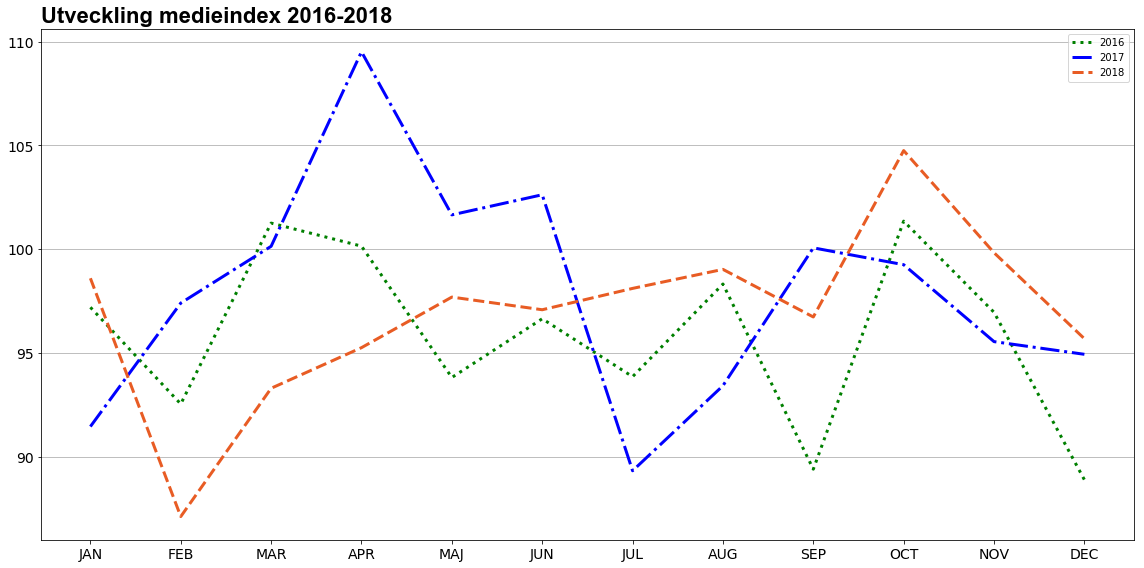

In [355]:
# Utveckling medieindex 2016-2018
y1 = graf_avg.iloc[:12]['avg'].values
y2 = graf_avg.iloc[12:24]['avg'].values
y3 = graf_avg.iloc[24:]['avg'].values

x_axis = np.arange(len(y1))

fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(x_axis, y1, color = "green", linestyle=':', label = '2016', linewidth = 3)
ax3.plot(x_axis, y2, color = "blue", linestyle='-.', label = '2017', linewidth = 3)
ax3.plot(x_axis, y3, color = "#E85C24", linestyle='--', label = '2018', linewidth = 3)


ax3.set_title('Utveckling medieindex 2016-2018', **text_kwargs)

ax3.grid(b = True, axis = 'y')

ax3.set_xticks(x_axis)

ax3.set_xticklabels(['JAN','FEB','MAR','APR','MAJ','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], rotation= 0)

#ax3.set_ybound(0,1000)

ax3.legend()

save_fig('Utveckling medieindex 2016-2018 - plot')



plt.show()

### Sedan tittar vi på NKS samt Vårdpersonal specifikt


In [356]:
df1.nykat1.value_counts()

Vårdpersonal                              4595
Pressmeddelande                           4478
Allmänt Stockholms Läns Landsting         3985
Debatt                                    3862
Vårdgivare                                3336
Vårdkvalitet                              3159
Forskning och nya rön                     3151
Patientsäkerhet                           3046
Övrigt                                    2693
Nya Karolinska sjukhuset                  1830
Ledare/Kolumn                             1553
VÅRDPLATSER/VÅRDTILLFÄLLEN                1537
Smitta                                    1521
Aktörer                                   1197
Psykvård                                  1170
Läkemedel                                 1084
INSÄNDARE                                  939
Vaccin                                     865
AMBULANS                                   833
Väntetider/Kötider                         829
Missbruk och beroende                      768
Vårdval      

In [357]:
df_spec = df1[(df1.nykat1.isin(['Vårdpersonal','Nya Karolinska sjukhuset'])) & (df1.year >= 2016) ]

__Vårdpersonal antal__

In [358]:
grouped_spec1 = df_spec[df_spec.nykat1 == 'Vårdpersonal'].groupby(['year','Month'])

In [359]:
# Först räknar vi antal per nyhetskategori
df_vard = grouped_spec1['index'].count().to_frame().reset_index().rename(columns = {'index':'n'})
df_vard.head()

,year,Month,n
0,2016,1,122
1,2016,2,271
2,2016,3,100
3,2016,4,56
4,2016,5,81


In [360]:
df_vard['mlabel'] = df_vard.apply(lambda x: mon(x['Month']), axis = 1)
df_vard['MY'] = df_vard.mlabel +  df_vard.year.astype('str').str[2:]
y1_n = df_vard.n.values

Saving figure Utveckling antal artiklar Vårdpersonal 2016-2018


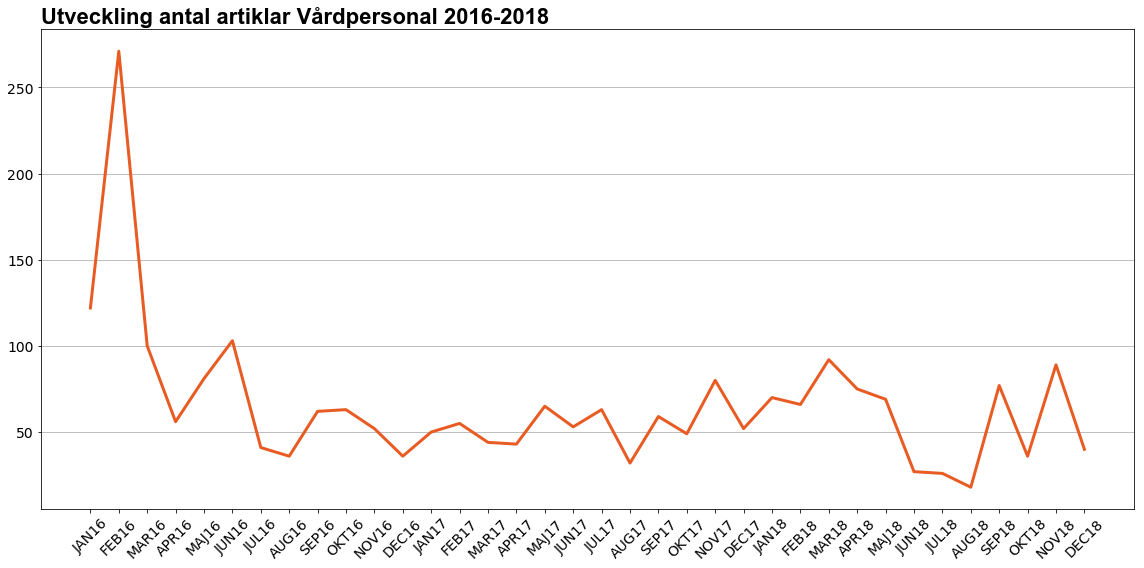

In [361]:
# Graf 

# Antal artiklar per månad 2016-2018

x_label_m = df_vard.MY.values

x_axis_m = np.arange(len(x_label_m))

fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(x_axis_m, y1_n, color = "#E85C24", linewidth = 3)

ax3.grid(b = True, axis = 'y')


ax3.set_title('Utveckling antal artiklar Vårdpersonal 2016-2018', **text_kwargs)

ax3.set_xticks(x_axis_m)

ax3.set_xticklabels(x_label_m, rotation= 45)

#ax3.set_ylim(200,1000)

save_fig('Utveckling antal artiklar Vårdpersonal 2016-2018')


plt.show()

__Vårdpersonal Medienindex__

In [362]:
# Först räknar vi antal per nyhetskategori
df_vard_avg = grouped_spec1['index'].mean().to_frame().reset_index().rename(columns = {'index':'avg'})
df_vard_avg.head()

,year,Month,avg
0,2016,1,77.827869
1,2016,2,81.771218
2,2016,3,91.080000
3,2016,4,80.000000
4,2016,5,83.358025


In [363]:
df_vard_avg['mlabel'] = df_vard_avg.apply(lambda x: mon(x['Month']), axis = 1)
df_vard_avg['MY'] = df_vard_avg.mlabel +  df_vard_avg.year.astype('str').str[2:]
y1_avg = df_vard_avg.avg.values

Saving figure Utveckling Medieindex Vårdpersonal 2016-2018


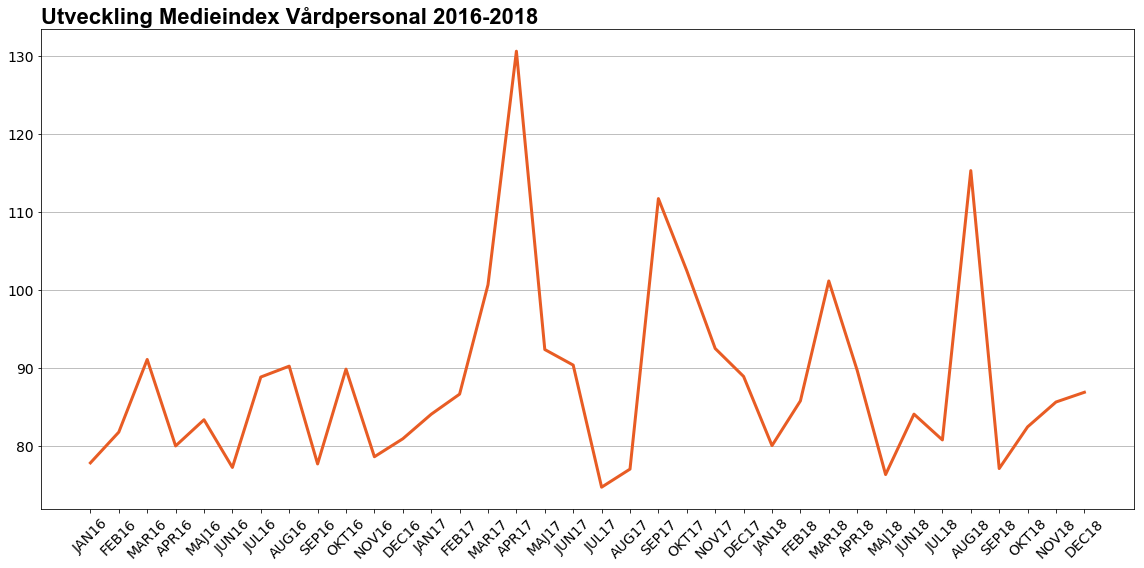

In [364]:
# Graf 

# Medieindex per månad 2016-2018

x_label_m = df_vard_avg.MY.values

x_axis_m = np.arange(len(x_label_m))

fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(x_axis_m, y1_avg, color = "#E85C24", linewidth = 3)

ax3.grid(b = True, axis = 'y')

ax3.set_title('Utveckling Medieindex Vårdpersonal 2016-2018', **text_kwargs)

ax3.set_xticks(x_axis_m)

ax3.set_xticklabels(x_label_m, rotation= 45)

#ax3.set_ylim(200,1000)

save_fig('Utveckling Medieindex Vårdpersonal 2016-2018')


plt.show()

__Nya Karolinska, antal och medieindex__

In [365]:
grouped_spec2 = df_spec[df_spec.nykat1 == 'Nya Karolinska sjukhuset'].groupby(['year','Month'])

In [366]:
# Först räknar vi antal per nyhetskategori
df_nks = grouped_spec2['index'].count().to_frame().reset_index().rename(columns = {'index':'n'})
df_nks.head()

,year,Month,n
0,2016,1,10
1,2016,2,7
2,2016,3,13
3,2016,4,23
4,2016,5,23


In [367]:
df_nks['mlabel'] = df_nks.apply(lambda x: mon(x['Month']), axis = 1)
df_nks['MY'] = df_nks.mlabel +  df_nks.year.astype('str').str[2:]
y2_n = df_nks.n.values

Saving figure Utveckling antal artiklar Nya K 2016-2018


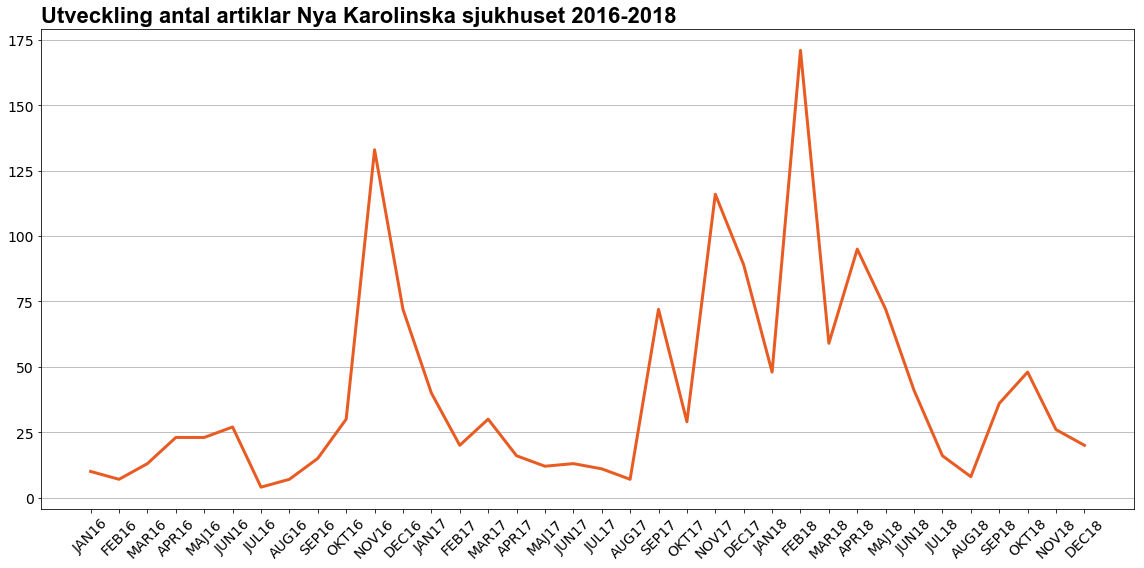

In [368]:
## Graf 

# Antal artiklar per månad 2016-2018

x_label_m = df_nks.MY.values

x_axis_m = np.arange(len(x_label_m))

fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(x_axis_m, y2_n, color = "#E85C24", linewidth = 3)

ax3.grid(b = True, axis = 'y')


ax3.set_title('Utveckling antal artiklar Nya Karolinska sjukhuset 2016-2018', **text_kwargs)

ax3.set_xticks(x_axis_m)

ax3.set_xticklabels(x_label_m, rotation= 45)

#ax3.set_ylim(200,1000)

save_fig('Utveckling antal artiklar Nya K 2016-2018')


plt.show()

In [369]:
# Sedan medieindex
# Först räknar vi antal per nyhetskategori
df_nks_avg = grouped_spec2['index'].mean().to_frame().reset_index().rename(columns = {'index':'avg'})
df_nks_avg.head()

,year,Month,avg
0,2016,1,70.200000
1,2016,2,92.000000
2,2016,3,86.230769
3,2016,4,97.521739
4,2016,5,79.130435


In [370]:
df_nks_avg['mlabel'] = df_nks_avg.apply(lambda x: mon(x['Month']), axis = 1)
df_nks_avg['MY'] = df_nks_avg.mlabel +  df_nks_avg.year.astype('str').str[2:]
y2_avg = df_nks_avg.avg.values

Saving figure Utveckling Medieindex Nya Karolinska sjukhuset 2016-2018


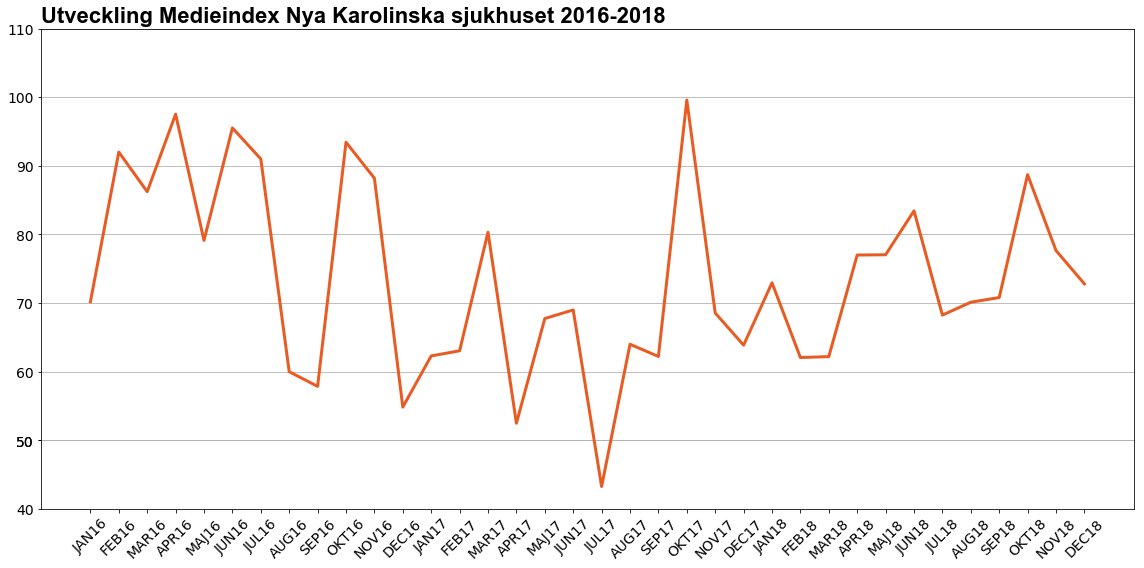

In [371]:
# Graf 

# Medieindex per månad 2016-2018

x_label_m = df_nks_avg.MY.values

x_axis_m = np.arange(len(x_label_m))

fig3, ax3 = plt.subplots(figsize = (16,8))

ax3.plot(x_axis_m, y2_avg, color = "#E85C24", linewidth = 3)

ax3.grid(b = True, axis = 'y')

ax3.set_title('Utveckling Medieindex Nya Karolinska sjukhuset 2016-2018', **text_kwargs)

ax3.set_xticks(x_axis_m)

ax3.set_xticklabels(x_label_m, rotation= 45)

ax3.set_yticks([40,50,50,60, 70,80,90,100,110])

save_fig('Utveckling Medieindex Nya Karolinska sjukhuset 2016-2018')


plt.show()

### Nu tittar vi på de 10 största kanalerna sedan 2012-2018

In [391]:
df1['nykat1'] = df1['nykat1'].str.title()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [393]:
df1['nykat1'] = np.where(df1.nykat1 == 'Allmänt Stockholms Läns Landsting','Allmänt SLL', df1.nykat1 )

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [481]:
## Skapar en lista som innehåller 8 dataframes med de största kanelrna per år
year_list = [2012,2013,2014,2015,2016,2017,2018]
df_list = []
for year in year_list:
    tmp_df1 = df1[df1.year == year]
    tmp_df2 = tmp_df1.nykat1.value_counts().to_frame().reset_index().\
    rename(columns = {'index':'Kategori', 'nykat1': 'n'}).iloc[:10]
    kat_array = tmp_df2.Kategori.values
    tmp_df_mean = tmp_df1[tmp_df1.nykat1.isin(kat_array)] 
    tmp_df_mean = tmp_df_mean.groupby('nykat1')['index'].mean().to_frame().reset_index().\
    rename(columns = {'index':'avg', 'nykat1':'Kategori'})
    tmp_df_mean['avg'] = round(tmp_df_mean.avg).astype('int')
    df_final = tmp_df2.merge(tmp_df_mean, on = 'Kategori', how = 'inner') 
    df_list.append(df_final)

In [482]:
df_list[0]

,Kategori,n,avg
0,Patientsäkerhet,613,70
1,Vårdkvalitet,426,117
2,Vårdgivare,384,94
3,Övrigt,365,102
4,Pressmeddelande,361,110
5,Vårdpersonal,337,76
6,Debatt,335,99
7,Forskning Och Nya Rön,317,119
8,Allmänt SLL,302,114
9,Smitta,245,109


In [480]:
df_list[0].sort_values('n', ascending = True)

,Kategori,n,avg
9,Smitta,245,109
8,Allmänt SLL,302,114
7,Forskning Och Nya Rön,317,119
6,Debatt,335,99
5,Vårdpersonal,337,76
4,Pressmeddelande,361,110
3,Övrigt,365,102
2,Vårdgivare,384,94
1,Vårdkvalitet,426,117
0,Patientsäkerhet,613,70


In [503]:
ax2.text?

Saving figure Change1


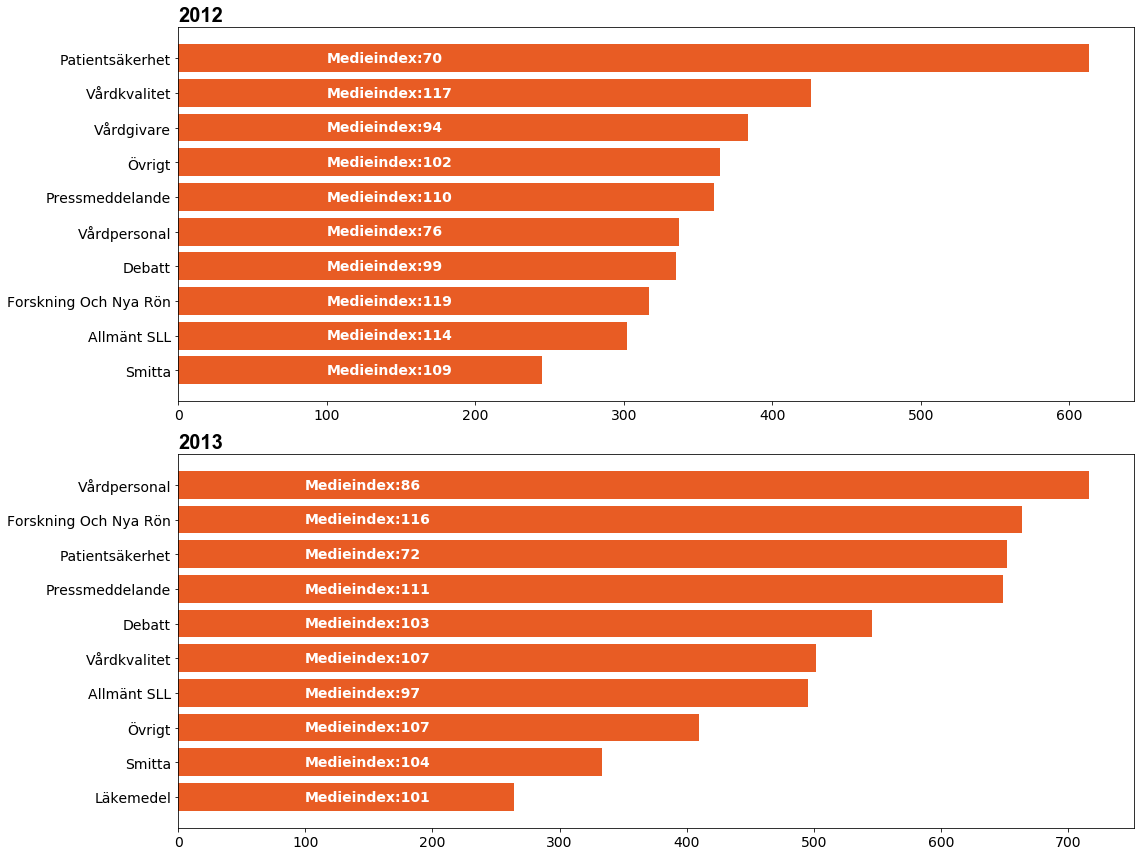

In [510]:
## Graf

fig, (ax1, ax2 ) = plt.subplots(2, 1, figsize=(16,12))

text_kwargs2=dict(fontsize=20, family = 'Arial', loc = 'left', fontweight = 'bold')

x_label_m = df_list[0].sort_values('n', ascending = True)['Kategori'].values
y_value = df_list[0].sort_values('n', ascending = True)['n'].values
x_axis_m = np.arange(len(x_label_m))
index_value = df_list[0].sort_values('n', ascending = True)['avg'].values
for x, y in zip(x_axis_m, index_value):
    ax1.text(100, x ,'Medieindex:' + str(y), va = 'center', fontsize=14, color = "white", fontweight = 'bold')

ax1.barh(x_axis_m , y_value, color = "#E85C24")
ax1.set_title('2012', **text_kwargs2)
ax1.set_yticks(x_axis_m)
ax1.set_yticklabels(x_label_m)

x_label_m = df_list[1].sort_values('n', ascending = True)['Kategori'].values
y_value = df_list[1].sort_values('n', ascending = True)['n'].values
x_axis_m = np.arange(len(x_label_m))

index_value = df_list[1].sort_values('n', ascending = True)['avg'].values

ax2.barh(x_axis_m , y_value, color = "#E85C24")
for x, y in zip(x_axis_m, index_value):
    ax2.text(100, x ,'Medieindex:' + str(y), va = 'center', fontsize=14, color = "white", fontweight = 'bold')

ax2.set_title('2013', **text_kwargs2)
ax2.set_yticks(x_axis_m)
ax2.set_yticklabels(x_label_m)

save_fig('Change1')


plt.show()

Saving figure Change2


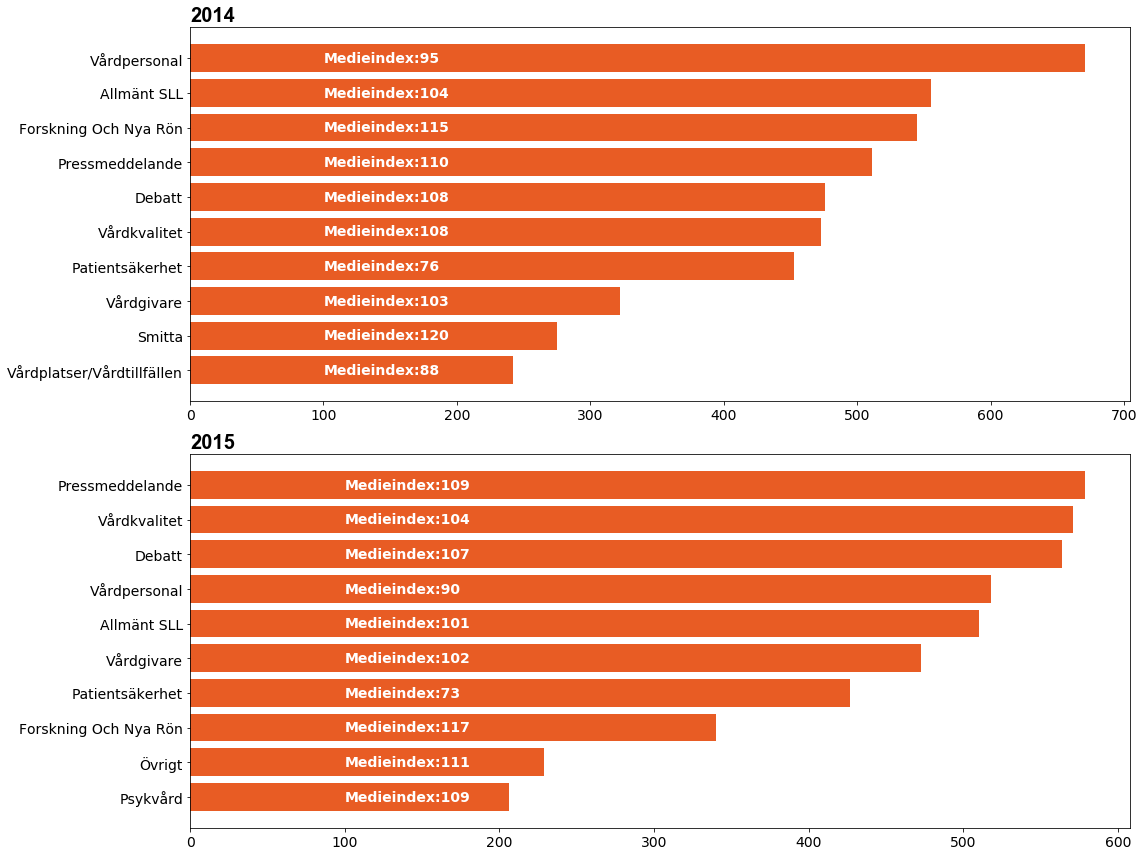

In [514]:
## Graf

fig, (ax1, ax2 ) = plt.subplots(2, 1, figsize=(16,12))

text_kwargs2=dict(fontsize=20, family = 'Arial', loc = 'left', fontweight = 'bold')

x_label_m = df_list[2].sort_values('n', ascending = True)['Kategori'].values
y_value = df_list[2].sort_values('n', ascending = True)['n'].values
x_axis_m = np.arange(len(x_label_m))
index_value = df_list[2].sort_values('n', ascending = True)['avg'].values
for x, y in zip(x_axis_m, index_value):
    ax1.text(100, x ,'Medieindex:' + str(y), va = 'center', fontsize=14, color = "white", fontweight = 'bold')

ax1.barh(x_axis_m , y_value, color = "#E85C24")
ax1.set_title('2014', **text_kwargs2)
ax1.set_yticks(x_axis_m)
ax1.set_yticklabels(x_label_m)

x_label_m = df_list[3].sort_values('n', ascending = True)['Kategori'].values
y_value = df_list[3].sort_values('n', ascending = True)['n'].values
x_axis_m = np.arange(len(x_label_m))

index_value = df_list[3].sort_values('n', ascending = True)['avg'].values

ax2.barh(x_axis_m , y_value, color = "#E85C24")
for x, y in zip(x_axis_m, index_value):
    ax2.text(100, x ,'Medieindex:' + str(y), va = 'center', fontsize=14, color = "white", fontweight = 'bold')

ax2.set_title('2015', **text_kwargs2)
ax2.set_yticks(x_axis_m)
ax2.set_yticklabels(x_label_m)

save_fig('Change2')


plt.show()

Saving figure Change3


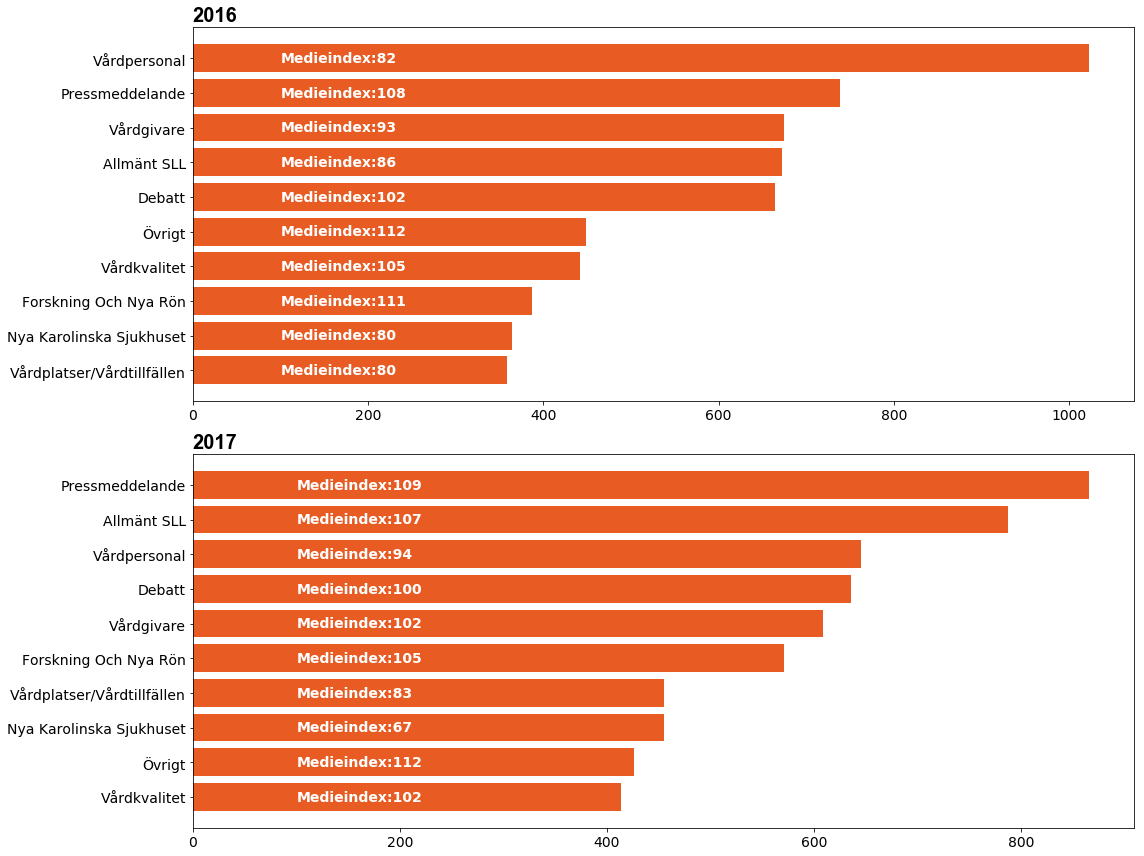

In [513]:
## Graf

fig, (ax1, ax2 ) = plt.subplots(2, 1, figsize=(16,12))

text_kwargs2=dict(fontsize=20, family = 'Arial', loc = 'left', fontweight = 'bold')

x_label_m = df_list[4].sort_values('n', ascending = True)['Kategori'].values
y_value = df_list[4].sort_values('n', ascending = True)['n'].values
x_axis_m = np.arange(len(x_label_m))
index_value = df_list[4].sort_values('n', ascending = True)['avg'].values
for x, y in zip(x_axis_m, index_value):
    ax1.text(100, x ,'Medieindex:' + str(y), va = 'center', fontsize=14, color = "white", fontweight = 'bold')

ax1.barh(x_axis_m , y_value, color = "#E85C24")
ax1.set_title('2016', **text_kwargs2)
ax1.set_yticks(x_axis_m)
ax1.set_yticklabels(x_label_m)

x_label_m = df_list[5].sort_values('n', ascending = True)['Kategori'].values
y_value = df_list[5].sort_values('n', ascending = True)['n'].values
x_axis_m = np.arange(len(x_label_m))

index_value = df_list[5].sort_values('n', ascending = True)['avg'].values

ax2.barh(x_axis_m , y_value, color = "#E85C24")
for x, y in zip(x_axis_m, index_value):
    ax2.text(100, x ,'Medieindex:' + str(y), va = 'center', fontsize=14, color = "white", fontweight = 'bold')

ax2.set_title('2017', **text_kwargs2)
ax2.set_yticks(x_axis_m)
ax2.set_yticklabels(x_label_m)

save_fig('Change3')


plt.show()

Saving figure Change7


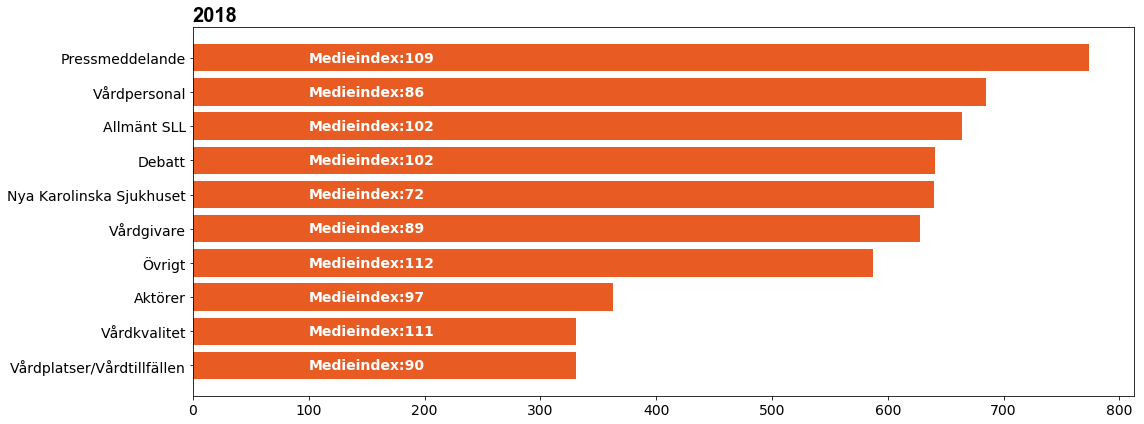

In [516]:
fig, (ax1) = plt.subplots(figsize=(16,6))

text_kwargs2=dict(fontsize=20, family = 'Arial', loc = 'left', fontweight = 'bold')

x_label_m = df_list[6].sort_values('n', ascending = True)['Kategori'].values
y_value = df_list[6].sort_values('n', ascending = True)['n'].values
x_axis_m = np.arange(len(x_label_m))
index_value = df_list[6].sort_values('n', ascending = True)['avg'].values
for x, y in zip(x_axis_m, index_value):
    ax1.text(100, x ,'Medieindex:' + str(y), va = 'center', fontsize=14, color = "white", fontweight = 'bold')

ax1.barh(x_axis_m , y_value, color = "#E85C24")
ax1.set_title('2018', **text_kwargs2)
ax1.set_yticks(x_axis_m)
ax1.set_yticklabels(x_label_m)


save_fig('Change7')


plt.show()